In [1]:
import torch          # pytorch
import numpy as np

Tensory w PyTorchu to specjalne struktury danych które przypominają tablice/macierze. Używamy ich do przechowywania wejśc/wyjść z sieci jak również wag modelu.
Tensory przypominają swoją budową tablice numpy https://numpy.org/, z zasadniczą różnicą ktorą jest łatwa możliwość przechowywania i operowania na tensorach na kartach graficznych 

Tensory mogą być tworzone w różny sposób:
1. Ze standardowych tablic

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

+ I rzutowane na float:

In [3]:
x_data.float()

tensor([[1., 2.],
        [3., 4.]])

2. Na podstawie tablic numpy

In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [6]:
torch.Tensor(np_array)

tensor([[1., 2.],
        [3., 4.]])

3. Na podstawie innych tensorów

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8127, 0.1196],
        [0.5807, 0.3084]]) 



4. Z losowymi lub stałymi wartościami

In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
ones_tensor = torch.ones(shape)
print(f"Ones Tensor: \n {ones_tensor} \n")
zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.3318, 0.4270, 0.1820],
        [0.8424, 0.4326, 0.8093]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### Atrybuty tensorów

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operacje na tensorach

Nie ma co się bać dokumentacji! (Jest bardzo przyjemnie napisana) Wszystkie operacje na tensorach są opisane tutaj: https://pytorch.org/docs/stable/torch.html
Standardowo operacje są uruchamiane na CPU, ale można przenosić tensory, całe modele i **wszystkie operacje** na GPU (co zazwyczaj jest szybsze) za pomocą prostej komendy. Przetestujemy to w kolejnych częściach laboratorium

#### Standardowe indeksowanie i slicing

In [7]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### Transponowanie tensorów

In [8]:
tensor = torch.ones(4, 3)
tensor[:,1] = 0
tensor[:,2] = 2
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")
tensor2 = tensor.T
print(tensor2)
print(f"Transposed tensor shape:{tensor2.shape}")

tensor([[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.]])
Tensor shape:torch.Size([4, 3])

tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.]])
Transposed tensor shape:torch.Size([3, 4])


#### Zmiana wymiarów

In [9]:
tensor = torch.ones([10])
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")

tensor2 = tensor.unsqueeze(dim=0)                     # zwiększenie wymiarowości
print(tensor2)
print(f"Tensor shape:{tensor2.shape}\n")

tensor3 = tensor.unsqueeze(dim=1)                     
print(tensor3)
print(f"Tensor shape:{tensor3.shape}\n")

tensor4 = tensor.view(5,2)                            # podajemy mają być dokładne, układa w wierszach
print(tensor4)
print(f"Tensor shape:{tensor4.shape}\n")

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Tensor shape:torch.Size([10])

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
Tensor shape:torch.Size([1, 10])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Tensor shape:torch.Size([10, 1])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
Tensor shape:torch.Size([5, 2])



In [17]:
sq1 = tensor3.squeeze() # usuwa wszystkie wymiary, które mają wartość 1
sq2 = tensor3.squeeze(dim=1) # speyfikujemy
sq1

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
sq2

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### Łączenie tensorów

In [24]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
t1 = torch.cat([tensor, tensor, tensor], dim=1)  # laczenie tensorow wraz z podawanym wymiarem
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [25]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [26]:
t1 = torch.stack([tensor, tensor, tensor])
print(t1)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [27]:
t1 = torch.stack([tensor, tensor, tensor],dim=0)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=1)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=2)
print(t1.shape)

torch.Size([3, 4, 4])
torch.Size([4, 3, 4])
torch.Size([4, 4, 3])


In [28]:
t1 = torch.stack([tensor, tensor, tensor],dim=3)
print(t1.shape)

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

#### Operacje arytmetyczne

In [29]:
print(tensor)
print(tensor+2)
print(tensor*5)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.]])
tensor([[5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.]])


#### Operacje na elementach

In [30]:
tensor * tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [31]:
tensor + tensor

tensor([[2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.]])

In [32]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor)
print(rand_tensor / tensor)

tensor([[2.5634, 8.9118, 3.0436, 8.2154],
        [2.9043, 1.1721, 4.2485, 9.3115],
        [6.5049, 5.0904, 6.0261, 9.1990],
        [8.8615, 9.8778, 7.3144, 8.6172]])
tensor([[2.5634,    inf, 3.0436, 8.2154],
        [2.9043,    inf, 4.2485, 9.3115],
        [6.5049,    inf, 6.0261, 9.1990],
        [8.8615,    inf, 7.3144, 8.6172]])


In [33]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor // tensor)
print((tensor / tensor).type())

tensor([[8., inf, 3., 8.],
        [9., inf, 5., 3.],
        [3., inf, 8., 8.],
        [8., inf, 7., 0.]])
torch.FloatTensor


c:\users\01149762\documents\ai\neural-networks-intro\venv\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


### Mini zadanie

Stwórz kwadratową macierz dwuwymiarową której wartości będą kolejnymi numerami od 1 do zadanej liczby x. Możesz założyć że pierwiastek kwadratowy z x jest liczbą całkowitą np. dla x=16 powinniśmy otrzymać wyjście. (Pętle są fujka :/ i zabronione)

Hint: https://pytorch.org/docs/stable/torch.html

In [45]:
x=16
t1=torch.linspace(1,x,x)
t1.view((int(np.sqrt(x)),int(np.sqrt(x))))

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.]])

### Operacje macierzowe

In [47]:
tensor = torch.ones(4, 3)
tensor[1,:] = 0
print(tensor)
print(tensor.T)

tensor([[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [48]:
y1 = tensor.matmul(tensor.T)
print(y1,"\n")
y2 = tensor @ tensor.T
print(y2)

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]]) 

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


### Zaawansowany przykład - regresja

Dla wszystkich którzy potrzebują powtórki z matmy: https://mml-book.github.io/

In [49]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [50]:
X = torch.tensor([apples_kg_ordered, plums_kg_ordered])
Y = torch.tensor(prices)
print(X)
print(Y)

tensor([[ 2,  4,  7,  3, 13],
        [ 3,  8,  9,  1,  1]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [51]:
X = X.T.float()
Y = Y.T
X

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])

In [52]:
Y

tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])

In [53]:
theta = torch.inverse((X.T@X))@X.T@Y
theta 

tensor([3.0065, 1.9963])

In [54]:
X @ theta

tensor([12.0020, 27.9967, 39.0126, 11.0159, 41.0810])

# Automatyczne obliczanie gradientu

Do automatycznego obliczania gradientu służy wbudowany pakiet torch.autograd, który umożliwia automatyczne obliczanie gradientu dla dowolnego grafu (ciągu obliczeń)

In [2]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [3]:
y = x + 2
y

tensor([3., 3., 3., 3., 3.], grad_fn=<AddBackward0>)

In [4]:
y = x * 2
y

tensor([2., 2., 2., 2., 2.], grad_fn=<MulBackward0>)

In [5]:
y = x @ x.T
y

tensor(5., grad_fn=<DotBackward>)

In [6]:
y = x - 2
y

tensor([-1., -1., -1., -1., -1.], grad_fn=<SubBackward0>)

In [7]:
y.grad_fn.next_functions[0][0]

In [8]:
y.grad_fn.next_functions[0][0].variable

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [9]:
z = y * y * 3

In [10]:
a = z.mean()
print(z)
print(a)

tensor([3., 3., 3., 3., 3.], grad_fn=<MulBackward0>)
tensor(3., grad_fn=<MeanBackward0>)


In [11]:
y.grad_fn.next_functions

((<AccumulateGrad at 0x1fcd0d352b0>, 0), (None, 0))

In [12]:
from torchviz import make_dot

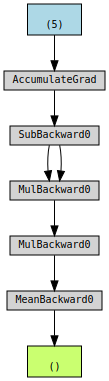

In [13]:
make_dot(a)

### Propagacja wsteczna gradientu

In [14]:
x = torch.ones(1, requires_grad=True)
print(x)
y = (x+4)**3
y

tensor([1.], requires_grad=True)


tensor([125.], grad_fn=<PowBackward0>)

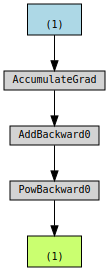

In [15]:
make_dot(y)

In [16]:
y.backward()
x.grad

tensor([75.])

#### Obliczenia z pominięciem gradientów

In [17]:
t1 = torch.rand(3,4, requires_grad=True)
t2 = torch.rand(4,3, requires_grad=True)
with torch.no_grad():
    y = t1@t2
print(y)
print(t1@t2)

tensor([[0.9582, 0.7237, 0.5347],
        [2.2483, 1.6438, 1.2810],
        [2.2424, 1.5974, 1.0001]])
tensor([[0.9582, 0.7237, 0.5347],
        [2.2483, 1.6438, 1.2810],
        [2.2424, 1.5974, 1.0001]], grad_fn=<MmBackward>)


#### Funkcja backward pozwala nam policzyć pochodną cząstkową w punkcie dla wszystkich źródeł (liści w grafie obliczeń)

In [18]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

In [19]:
w = torch.randn(5, 3, requires_grad=True) #weights
b = torch.randn(3, requires_grad=True) #bias

In [20]:
z = torch.matmul(x, w)+b
z

tensor([ 1.1493, -2.9521, -0.0114], grad_fn=<AddBackward0>)

In [21]:
loss = torch.abs((z-y)).mean()
loss

tensor(1.3709, grad_fn=<MeanBackward0>)

In [22]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ 0.3333, -0.3333, -0.3333],
        [ 0.3333, -0.3333, -0.3333],
        [ 0.3333, -0.3333, -0.3333],
        [ 0.3333, -0.3333, -0.3333],
        [ 0.3333, -0.3333, -0.3333]])
tensor([ 0.3333, -0.3333, -0.3333])


# Regresja raz jeszcze

In [97]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [98]:
X = torch.tensor([apples_kg_ordered,plums_kg_ordered])
Y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [99]:
params = torch.rand(2,requires_grad=True)
params

tensor([0.1450, 0.4819], requires_grad=True)

In [100]:
y_pred = X@params
y_pred

tensor([1.7358, 4.4355, 5.3525, 0.9170, 2.3670], grad_fn=<MvBackward>)

In [101]:
loss = (torch.square(Y-y_pred)).mean()
loss

tensor(678.8600, grad_fn=<MeanBackward0>)

In [102]:
loss.backward()

In [103]:
params.grad

tensor([-353.5908, -228.4170])

In [104]:
lr = 0.001

In [105]:
print(params)
params - lr *params.grad

tensor([0.1450, 0.4819], requires_grad=True)


tensor([0.4986, 0.7104], grad_fn=<SubBackward0>)

In [106]:
params = torch.rand(2,requires_grad=True)

In [107]:
for epoch in range(50):
    y_pred = X@params
    loss = (torch.square(Y-y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr *params.grad)
    print(f"Param values: {params[0]:.5}, {params[1]:.5}", f"Gradients: {params.grad[0]:.4}, {params.grad[1]:.4} ")
#     print()
    params.grad.zero_()

Param values: 0.55849, 0.2892 Gradients: -370.2, -254.3 
Param values: 0.88025, 0.51029 Gradients: -321.8, -221.1 
Param values: 1.1599, 0.70253 Gradients: -279.6, -192.2 
Param values: 1.4029, 0.86969 Gradients: -243.0, -167.2 
Param values: 1.614, 1.015 Gradients: -211.2, -145.4 
Param values: 1.7975, 1.1414 Gradients: -183.5, -126.4 
Param values: 1.957, 1.2514 Gradients: -159.5, -109.9 
Param values: 2.0956, 1.347 Gradients: -138.6, -95.6 
Param values: 2.2159, 1.4301 Gradients: -120.4, -83.15 
Param values: 2.3206, 1.5025 Gradients: -104.6, -72.33 
Param values: 2.4114, 1.5654 Gradients: -90.89, -62.92 
Param values: 2.4904, 1.6201 Gradients: -78.96, -54.74 
Param values: 2.559, 1.6677 Gradients: -68.6, -47.63 
Param values: 2.6186, 1.7092 Gradients: -59.59, -41.45 
Param values: 2.6704, 1.7453 Gradients: -51.76, -36.07 
Param values: 2.7153, 1.7767 Gradients: -44.96, -31.4 
Param values: 2.7544, 1.804 Gradients: -39.05, -27.34 
Param values: 2.7883, 1.8278 Gradients: -33.91, -23.

### Zadanie
Tym razem na innym targu do ceny owoców doliczany jest stały koszt reklamówki. Napisz model regresji liniowej który oszacuje cenę kg ziemniaków, pomidorów i reklamówki

In [43]:
potatoes_kg_ordered = [1,3,7,3,10,6,8,4,3,1,2,0]
tomatoes_kg_ordered = [5,2,3,1,2,3,6,7,3,2,3,1]
prices = [22.37 , 14.45, 26.6, 10.44, 28.49, 24.52, 40.38, 36.51, 18.50, 10.46, 16.51, 4.58]

In [44]:
params = torch.rand(2, requires_grad=True)
param_bagprice = torch.rand(1, requires_grad=True)
lr = 0.001

In [45]:
X = torch.tensor([potatoes_kg_ordered,tomatoes_kg_ordered])
Y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

tensor([[ 1.,  5.],
        [ 3.,  2.],
        [ 7.,  3.],
        [ 3.,  1.],
        [10.,  2.],
        [ 6.,  3.],
        [ 8.,  6.],
        [ 4.,  7.],
        [ 3.,  3.],
        [ 1.,  2.],
        [ 2.,  3.],
        [ 0.,  1.]])
tensor([22.3700, 14.4500, 26.6000, 10.4400, 28.4900, 24.5200, 40.3800, 36.5100,
        18.5000, 10.4600, 16.5100,  4.5800])


In [46]:
for epoch in range(10000):
    y_pred = X@params + param_bagprice
    loss = (torch.square(Y-y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr *params.grad)
        param_bagprice.copy_(param_bagprice - lr *param_bagprice.grad)
    print(f"Param values: {params[0]:.5}, {params[1]:.5}, {param_bagprice[0]:.5}", f"Gradients: {params.grad[0]:.4}, {params.grad[1]:.4}, {param_bagprice.grad[0]:.5}")
#     print()
    params.grad.zero_()
    param_bagprice.grad.zero_()

Param values: 0.56538, 1.0554, 0.46522 Gradients: -164.8, -126.4, -32.348
Param values: 0.71827, 1.1736, 0.49538 Gradients: -152.9, -118.3, -30.164
Param values: 0.86005, 1.2843, 0.52352 Gradients: -141.8, -110.7, -28.132
Param values: 0.9915, 1.3879, 0.54976 Gradients: -131.4, -103.6, -26.24
Param values: 1.1133, 1.485, 0.57424 Gradients: -121.8, -97.06, -24.48
Param values: 1.2263, 1.576, 0.59708 Gradients: -112.9, -90.95, -22.841
Param values: 1.3309, 1.6612, 0.61839 Gradients: -104.6, -85.25, -21.316
Param values: 1.4277, 1.7412, 0.63829 Gradients: -96.88, -79.95, -19.897
Param values: 1.5174, 1.8162, 0.65687 Gradients: -89.7, -75.01, -18.576
Param values: 1.6005, 1.8866, 0.67421 Gradients: -83.02, -70.41, -17.346
Param values: 1.6773, 1.9527, 0.69041 Gradients: -76.81, -66.13, -16.201
Param values: 1.7483, 2.0148, 0.70555 Gradients: -71.03, -62.14, -15.136
Param values: 1.814, 2.0733, 0.71969 Gradients: -65.67, -58.42, -14.144
Param values: 1.8746, 2.1282, 0.73291 Gradients: -60.6

Param values: 1.9988, 3.8725, 0.95995 Gradients: 0.2053, -0.3425, 0.13382
Param values: 1.9986, 3.8728, 0.95981 Gradients: 0.2035, -0.3399, 0.13408
Param values: 1.9984, 3.8732, 0.95968 Gradients: 0.2018, -0.3373, 0.13434
Param values: 1.9982, 3.8735, 0.95955 Gradients: 0.2, -0.3347, 0.13459
Param values: 1.998, 3.8738, 0.95941 Gradients: 0.1982, -0.3322, 0.13484
Param values: 1.9978, 3.8742, 0.95928 Gradients: 0.1965, -0.3297, 0.13509
Param values: 1.9976, 3.8745, 0.95914 Gradients: 0.1948, -0.3272, 0.13534
Param values: 1.9974, 3.8748, 0.95901 Gradients: 0.1931, -0.3247, 0.13558
Param values: 1.9972, 3.8751, 0.95887 Gradients: 0.1914, -0.3222, 0.13582
Param values: 1.997, 3.8755, 0.95873 Gradients: 0.1897, -0.3198, 0.13606
Param values: 1.9968, 3.8758, 0.9586 Gradients: 0.1881, -0.3174, 0.13629
Param values: 1.9966, 3.8761, 0.95846 Gradients: 0.1864, -0.315, 0.13653
Param values: 1.9964, 3.8764, 0.95832 Gradients: 0.1848, -0.3126, 0.13676
Param values: 1.9962, 3.8767, 0.95819 Gradien

Param values: 1.9781, 3.9206, 0.89594 Gradients: -0.003652, -0.03386, 0.14555
Param values: 1.9781, 3.9207, 0.8958 Gradients: -0.0037, -0.03377, 0.1455
Param values: 1.9781, 3.9207, 0.89565 Gradients: -0.003741, -0.03369, 0.14545
Param values: 1.9781, 3.9207, 0.89551 Gradients: -0.003802, -0.03362, 0.1454
Param values: 1.9781, 3.9208, 0.89536 Gradients: -0.003842, -0.03354, 0.14536
Param values: 1.9781, 3.9208, 0.89521 Gradients: -0.003892, -0.03346, 0.14531
Param values: 1.9781, 3.9208, 0.89507 Gradients: -0.003932, -0.03338, 0.14526
Param values: 1.9781, 3.9209, 0.89492 Gradients: -0.003968, -0.03329, 0.14522
Param values: 1.9781, 3.9209, 0.89478 Gradients: -0.004016, -0.03322, 0.14517
Param values: 1.9781, 3.9209, 0.89463 Gradients: -0.004053, -0.03314, 0.14512
Param values: 1.9781, 3.921, 0.89449 Gradients: -0.004095, -0.03306, 0.14507
Param values: 1.9781, 3.921, 0.89434 Gradients: -0.004139, -0.03298, 0.14502
Param values: 1.9781, 3.921, 0.8942 Gradients: -0.004178, -0.03291, 0.1

Param values: 1.9813, 3.9317, 0.83735 Gradients: -0.008046, -0.02149, 0.12396
Param values: 1.9813, 3.9317, 0.83723 Gradients: -0.00805, -0.02149, 0.12391
Param values: 1.9813, 3.9317, 0.83711 Gradients: -0.008045, -0.02147, 0.12387
Param values: 1.9813, 3.9318, 0.83698 Gradients: -0.00804, -0.02146, 0.12382
Param values: 1.9813, 3.9318, 0.83686 Gradients: -0.008048, -0.02146, 0.12377
Param values: 1.9813, 3.9318, 0.83674 Gradients: -0.008035, -0.02144, 0.12372
Param values: 1.9813, 3.9318, 0.83661 Gradients: -0.008044, -0.02144, 0.12368
Param values: 1.9813, 3.9318, 0.83649 Gradients: -0.008036, -0.02142, 0.12363
Param values: 1.9813, 3.9319, 0.83636 Gradients: -0.008037, -0.02141, 0.12358
Param values: 1.9813, 3.9319, 0.83624 Gradients: -0.008029, -0.0214, 0.12353
Param values: 1.9813, 3.9319, 0.83612 Gradients: -0.008032, -0.02139, 0.12349
Param values: 1.9814, 3.9319, 0.83599 Gradients: -0.008031, -0.02138, 0.12344
Param values: 1.9814, 3.932, 0.83587 Gradients: -0.008025, -0.02137

Param values: 1.9845, 3.9402, 0.78782 Gradients: -0.006942, -0.01799, 0.10488
Param values: 1.9845, 3.9402, 0.78771 Gradients: -0.006936, -0.01798, 0.10484
Param values: 1.9845, 3.9403, 0.78761 Gradients: -0.006947, -0.01798, 0.1048
Param values: 1.9845, 3.9403, 0.7875 Gradients: -0.006944, -0.01798, 0.10476
Param values: 1.9845, 3.9403, 0.7874 Gradients: -0.006951, -0.01798, 0.10471
Param values: 1.9846, 3.9403, 0.78729 Gradients: -0.006944, -0.01797, 0.10467
Param values: 1.9846, 3.9403, 0.78719 Gradients: -0.006939, -0.01796, 0.10463
Param values: 1.9846, 3.9403, 0.78709 Gradients: -0.006946, -0.01796, 0.10459
Param values: 1.9846, 3.9404, 0.78698 Gradients: -0.006941, -0.01795, 0.10455
Param values: 1.9846, 3.9404, 0.78688 Gradients: -0.006938, -0.01795, 0.10451
Param values: 1.9846, 3.9404, 0.78677 Gradients: -0.006936, -0.01794, 0.10447
Param values: 1.9846, 3.9404, 0.78667 Gradients: -0.00693, -0.01793, 0.10443
Param values: 1.9846, 3.9404, 0.78656 Gradients: -0.006938, -0.01793

Param values: 1.9873, 3.9474, 0.74618 Gradients: -0.005892, -0.01525, 0.088813
Param values: 1.9873, 3.9474, 0.74609 Gradients: -0.005888, -0.01524, 0.088779
Param values: 1.9873, 3.9474, 0.746 Gradients: -0.005879, -0.01523, 0.088747
Param values: 1.9873, 3.9474, 0.74592 Gradients: -0.005879, -0.01522, 0.088712
Param values: 1.9873, 3.9474, 0.74583 Gradients: -0.005875, -0.01522, 0.088678
Param values: 1.9873, 3.9474, 0.74574 Gradients: -0.005878, -0.01521, 0.088643
Param values: 1.9873, 3.9474, 0.74565 Gradients: -0.005869, -0.0152, 0.08861
Param values: 1.9873, 3.9475, 0.74556 Gradients: -0.005866, -0.0152, 0.088576
Param values: 1.9873, 3.9475, 0.74547 Gradients: -0.005865, -0.01519, 0.088542
Param values: 1.9873, 3.9475, 0.74538 Gradients: -0.005867, -0.01518, 0.088507
Param values: 1.9873, 3.9475, 0.7453 Gradients: -0.005855, -0.01517, 0.088475
Param values: 1.9873, 3.9475, 0.74521 Gradients: -0.005846, -0.01516, 0.088442
Param values: 1.9873, 3.9475, 0.74512 Gradients: -0.005849

Param values: 1.9894, 3.9529, 0.71365 Gradients: -0.005051, -0.01309, 0.076264
Param values: 1.9894, 3.9529, 0.71357 Gradients: -0.005057, -0.01309, 0.076233
Param values: 1.9894, 3.953, 0.7135 Gradients: -0.005053, -0.01308, 0.076204
Param values: 1.9894, 3.953, 0.71342 Gradients: -0.005051, -0.01308, 0.076175
Param values: 1.9894, 3.953, 0.71334 Gradients: -0.005042, -0.01307, 0.076147
Param values: 1.9895, 3.953, 0.71327 Gradients: -0.005042, -0.01306, 0.076117
Param values: 1.9895, 3.953, 0.71319 Gradients: -0.005035, -0.01305, 0.076089
Param values: 1.9895, 3.953, 0.71312 Gradients: -0.005035, -0.01305, 0.076059
Param values: 1.9895, 3.953, 0.71304 Gradients: -0.005033, -0.01304, 0.07603
Param values: 1.9895, 3.953, 0.71296 Gradients: -0.005036, -0.01304, 0.076
Param values: 1.9895, 3.9531, 0.71289 Gradients: -0.005033, -0.01303, 0.075971
Param values: 1.9895, 3.9531, 0.71281 Gradients: -0.005034, -0.01303, 0.075941
Param values: 1.9895, 3.9531, 0.71274 Gradients: -0.005023, -0.01

Param values: 1.9914, 3.958, 0.68415 Gradients: -0.004306, -0.01114, 0.064883
Param values: 1.9914, 3.958, 0.68408 Gradients: -0.004302, -0.01113, 0.064858
Param values: 1.9914, 3.958, 0.68402 Gradients: -0.004299, -0.01113, 0.064833
Param values: 1.9914, 3.958, 0.68395 Gradients: -0.004293, -0.01112, 0.064809
Param values: 1.9914, 3.958, 0.68389 Gradients: -0.004291, -0.01112, 0.064784
Param values: 1.9914, 3.958, 0.68382 Gradients: -0.004287, -0.01111, 0.06476
Param values: 1.9914, 3.958, 0.68376 Gradients: -0.004277, -0.0111, 0.064737
Param values: 1.9914, 3.9581, 0.68369 Gradients: -0.004268, -0.01109, 0.064713
Param values: 1.9914, 3.9581, 0.68363 Gradients: -0.004269, -0.01108, 0.064688
Param values: 1.9914, 3.9581, 0.68357 Gradients: -0.004266, -0.01108, 0.064663
Param values: 1.9914, 3.9581, 0.6835 Gradients: -0.004265, -0.01108, 0.064638
Param values: 1.9914, 3.9581, 0.68344 Gradients: -0.004267, -0.01107, 0.064612
Param values: 1.9914, 3.9581, 0.68337 Gradients: -0.00427, -0.

Param values: 1.9931, 3.9624, 0.6585 Gradients: -0.003627, -0.00942, 0.054994
Param values: 1.9931, 3.9624, 0.65844 Gradients: -0.003621, -0.009412, 0.054973
Param values: 1.9931, 3.9624, 0.65839 Gradients: -0.003623, -0.009414, 0.054951
Param values: 1.9931, 3.9624, 0.65833 Gradients: -0.003627, -0.009413, 0.054929
Param values: 1.9931, 3.9624, 0.65828 Gradients: -0.003638, -0.009422, 0.054905
Param values: 1.9931, 3.9624, 0.65822 Gradients: -0.00363, -0.009408, 0.054886
Param values: 1.9931, 3.9624, 0.65817 Gradients: -0.003633, -0.009406, 0.054864
Param values: 1.9931, 3.9624, 0.65812 Gradients: -0.003633, -0.009408, 0.054842
Param values: 1.9931, 3.9625, 0.65806 Gradients: -0.003637, -0.009411, 0.054819
Param values: 1.9931, 3.9625, 0.65801 Gradients: -0.003632, -0.009402, 0.054799
Param values: 1.9931, 3.9625, 0.65795 Gradients: -0.003644, -0.00941, 0.054775
Param values: 1.9931, 3.9625, 0.6579 Gradients: -0.003632, -0.009399, 0.054756
Param values: 1.9931, 3.9625, 0.65784 Gradien

Param values: 1.9945, 3.966, 0.63723 Gradients: -0.003099, -0.008036, 0.046783
Param values: 1.9945, 3.966, 0.63718 Gradients: -0.003094, -0.008029, 0.046766
Param values: 1.9945, 3.966, 0.63714 Gradients: -0.003087, -0.008021, 0.046749
Param values: 1.9945, 3.966, 0.63709 Gradients: -0.003087, -0.008019, 0.046731
Param values: 1.9945, 3.9661, 0.63704 Gradients: -0.003083, -0.008016, 0.046713
Param values: 1.9945, 3.9661, 0.637 Gradients: -0.003076, -0.008007, 0.046697
Param values: 1.9945, 3.9661, 0.63695 Gradients: -0.003067, -0.007995, 0.04668
Param values: 1.9945, 3.9661, 0.6369 Gradients: -0.003067, -0.007994, 0.046662
Param values: 1.9945, 3.9661, 0.63686 Gradients: -0.003064, -0.007989, 0.046645
Param values: 1.9945, 3.9661, 0.63681 Gradients: -0.003059, -0.007981, 0.046628
Param values: 1.9945, 3.9661, 0.63676 Gradients: -0.003049, -0.007974, 0.046611
Param values: 1.9945, 3.9661, 0.63672 Gradients: -0.003056, -0.007978, 0.046591
Param values: 1.9945, 3.9661, 0.63667 Gradients:

Param values: 1.9957, 3.9691, 0.61917 Gradients: -0.002634, -0.006847, 0.039817
Param values: 1.9957, 3.9691, 0.61913 Gradients: -0.002637, -0.006845, 0.0398
Param values: 1.9957, 3.9691, 0.61909 Gradients: -0.002633, -0.006841, 0.039786
Param values: 1.9957, 3.9691, 0.61905 Gradients: -0.002628, -0.006833, 0.039772
Param values: 1.9957, 3.9691, 0.61901 Gradients: -0.002622, -0.006828, 0.039757
Param values: 1.9957, 3.9692, 0.61897 Gradients: -0.002622, -0.006825, 0.039742
Param values: 1.9957, 3.9692, 0.61893 Gradients: -0.002623, -0.006823, 0.039727
Param values: 1.9957, 3.9692, 0.6189 Gradients: -0.002614, -0.006814, 0.039713
Param values: 1.9957, 3.9692, 0.61886 Gradients: -0.002613, -0.00681, 0.039698
Param values: 1.9957, 3.9692, 0.61882 Gradients: -0.002614, -0.006808, 0.039682
Param values: 1.9957, 3.9692, 0.61878 Gradients: -0.002597, -0.006794, 0.03967
Param values: 1.9957, 3.9692, 0.61874 Gradients: -0.002606, -0.006802, 0.039653
Param values: 1.9957, 3.9692, 0.6187 Gradient

Param values: 1.9967, 3.9718, 0.6034 Gradients: -0.00224, -0.005822, 0.033728
Param values: 1.9967, 3.9718, 0.60337 Gradients: -0.00223, -0.005816, 0.033717
Param values: 1.9967, 3.9718, 0.60333 Gradients: -0.002233, -0.005817, 0.033703
Param values: 1.9967, 3.9718, 0.6033 Gradients: -0.002237, -0.005817, 0.033689
Param values: 1.9967, 3.9718, 0.60327 Gradients: -0.002232, -0.005815, 0.033677
Param values: 1.9967, 3.9718, 0.60323 Gradients: -0.002226, -0.005806, 0.033664
Param values: 1.9967, 3.9719, 0.6032 Gradients: -0.002228, -0.005806, 0.033651
Param values: 1.9967, 3.9719, 0.60316 Gradients: -0.00222, -0.0058, 0.033639
Param values: 1.9967, 3.9719, 0.60313 Gradients: -0.002229, -0.005809, 0.033624
Param values: 1.9967, 3.9719, 0.6031 Gradients: -0.00223, -0.005809, 0.033611
Param values: 1.9967, 3.9719, 0.60306 Gradients: -0.002223, -0.005803, 0.033599
Param values: 1.9967, 3.9719, 0.60303 Gradients: -0.002219, -0.005794, 0.033586
Param values: 1.9967, 3.9719, 0.603 Gradients: -0.

Param values: 1.9976, 3.9741, 0.59018 Gradients: -0.00187, -0.004901, 0.028639
Param values: 1.9976, 3.9741, 0.59015 Gradients: -0.001859, -0.004892, 0.028629
Param values: 1.9976, 3.9741, 0.59012 Gradients: -0.001859, -0.004892, 0.028618
Param values: 1.9976, 3.9741, 0.5901 Gradients: -0.001851, -0.004883, 0.028608
Param values: 1.9976, 3.9741, 0.59007 Gradients: -0.001859, -0.004888, 0.028596
Param values: 1.9976, 3.9741, 0.59004 Gradients: -0.001852, -0.00488, 0.028586
Param values: 1.9976, 3.9741, 0.59001 Gradients: -0.001854, -0.004882, 0.028574
Param values: 1.9976, 3.9741, 0.58998 Gradients: -0.001855, -0.004881, 0.028563
Param values: 1.9976, 3.9741, 0.58995 Gradients: -0.001857, -0.004881, 0.028552
Param values: 1.9976, 3.9741, 0.58992 Gradients: -0.00186, -0.004884, 0.02854
Param values: 1.9976, 3.9741, 0.5899 Gradients: -0.001862, -0.004886, 0.028528
Param values: 1.9976, 3.9741, 0.58987 Gradients: -0.001863, -0.004885, 0.028516
Param values: 1.9976, 3.9741, 0.58984 Gradient

Param values: 1.9983, 3.976, 0.57901 Gradients: -0.001614, -0.00417, 0.024326
Param values: 1.9983, 3.976, 0.57899 Gradients: -0.001608, -0.004166, 0.024317
Param values: 1.9983, 3.976, 0.57896 Gradients: -0.001613, -0.004168, 0.024306
Param values: 1.9983, 3.976, 0.57894 Gradients: -0.001621, -0.004175, 0.024295
Param values: 1.9983, 3.976, 0.57891 Gradients: -0.001602, -0.00416, 0.024289
Param values: 1.9983, 3.976, 0.57889 Gradients: -0.001611, -0.004168, 0.024278
Param values: 1.9983, 3.976, 0.57886 Gradients: -0.001615, -0.004167, 0.024268
Param values: 1.9983, 3.976, 0.57884 Gradients: -0.001614, -0.004166, 0.024258
Param values: 1.9983, 3.976, 0.57882 Gradients: -0.001612, -0.004169, 0.024249
Param values: 1.9983, 3.976, 0.57879 Gradients: -0.001606, -0.004163, 0.02424
Param values: 1.9983, 3.976, 0.57877 Gradients: -0.001615, -0.004166, 0.024229
Param values: 1.9983, 3.976, 0.57874 Gradients: -0.00161, -0.004165, 0.02422
Param values: 1.9983, 3.9761, 0.57872 Gradients: -0.00160

Param values: 1.999, 3.9776, 0.56952 Gradients: -0.001372, -0.003597, 0.020655
Param values: 1.999, 3.9776, 0.5695 Gradients: -0.001372, -0.0036, 0.020647
Param values: 1.999, 3.9776, 0.56948 Gradients: -0.001355, -0.003587, 0.020642
Param values: 1.999, 3.9776, 0.56946 Gradients: -0.00136, -0.00359, 0.020633
Param values: 1.999, 3.9776, 0.56944 Gradients: -0.001362, -0.003588, 0.020625
Param values: 1.999, 3.9776, 0.56942 Gradients: -0.001363, -0.003585, 0.020617
Param values: 1.999, 3.9776, 0.5694 Gradients: -0.001365, -0.003586, 0.020609
Param values: 1.999, 3.9776, 0.56938 Gradients: -0.00137, -0.003586, 0.0206
Param values: 1.999, 3.9777, 0.56935 Gradients: -0.001369, -0.003587, 0.020592
Param values: 1.999, 3.9777, 0.56933 Gradients: -0.001363, -0.00358, 0.020585
Param values: 1.999, 3.9777, 0.56931 Gradients: -0.001363, -0.003578, 0.020577
Param values: 1.999, 3.9777, 0.56929 Gradients: -0.00137, -0.003583, 0.020568
Param values: 1.999, 3.9777, 0.56927 Gradients: -0.001363, -0.0

Param values: 1.9995, 3.979, 0.5616 Gradients: -0.001128, -0.003011, 0.017613
Param values: 1.9995, 3.979, 0.56158 Gradients: -0.001124, -0.003004, 0.017607
Param values: 1.9995, 3.979, 0.56156 Gradients: -0.001132, -0.00301, 0.017599
Param values: 1.9995, 3.979, 0.56155 Gradients: -0.00113, -0.003006, 0.017592
Param values: 1.9995, 3.979, 0.56153 Gradients: -0.001136, -0.003008, 0.017585
Param values: 1.9995, 3.979, 0.56151 Gradients: -0.00113, -0.003004, 0.017579
Param values: 1.9995, 3.979, 0.56149 Gradients: -0.001122, -0.002996, 0.017574
Param values: 1.9995, 3.979, 0.56148 Gradients: -0.001135, -0.003001, 0.017565
Param values: 1.9995, 3.979, 0.56146 Gradients: -0.001125, -0.002991, 0.01756
Param values: 1.9995, 3.979, 0.56144 Gradients: -0.001132, -0.002997, 0.017552
Param values: 1.9995, 3.979, 0.56142 Gradients: -0.001127, -0.002994, 0.017546
Param values: 1.9995, 3.979, 0.56141 Gradients: -0.00113, -0.00299, 0.017539
Param values: 1.9995, 3.979, 0.56139 Gradients: -0.001135, 

Param values: 1.9999, 3.9802, 0.55466 Gradients: -0.0009983, -0.00261, 0.014921
Param values: 1.9999, 3.9802, 0.55464 Gradients: -0.000999, -0.00261, 0.014915
Param values: 1.9999, 3.9802, 0.55463 Gradients: -0.001004, -0.002615, 0.014908
Param values: 1.9999, 3.9802, 0.55461 Gradients: -0.0009987, -0.002608, 0.014904
Param values: 1.9999, 3.9802, 0.5546 Gradients: -0.001002, -0.002609, 0.014897
Param values: 1.9999, 3.9802, 0.55458 Gradients: -0.001001, -0.002608, 0.014892
Param values: 1.9999, 3.9802, 0.55457 Gradients: -0.001003, -0.002606, 0.014886
Param values: 1.9999, 3.9802, 0.55455 Gradients: -0.001001, -0.002603, 0.014881
Param values: 1.9999, 3.9802, 0.55454 Gradients: -0.0009956, -0.002601, 0.014876
Param values: 1.9999, 3.9802, 0.55452 Gradients: -0.0009956, -0.0026, 0.01487
Param values: 1.9999, 3.9802, 0.55451 Gradients: -0.0009907, -0.002592, 0.014865
Param values: 2.0, 3.9802, 0.55449 Gradients: -0.0009944, -0.002591, 0.014859
Param values: 2.0, 3.9802, 0.55448 Gradient

Param values: 2.0003, 3.9812, 0.54886 Gradients: -0.0008378, -0.002248, 0.012681
Param values: 2.0003, 3.9812, 0.54884 Gradients: -0.000834, -0.002248, 0.012677
Param values: 2.0003, 3.9812, 0.54883 Gradients: -0.0008378, -0.002249, 0.012671
Param values: 2.0003, 3.9812, 0.54882 Gradients: -0.0008289, -0.002242, 0.012667
Param values: 2.0003, 3.9812, 0.54881 Gradients: -0.0008434, -0.002254, 0.01266
Param values: 2.0003, 3.9812, 0.54879 Gradients: -0.000837, -0.002249, 0.012656
Param values: 2.0003, 3.9812, 0.54878 Gradients: -0.0008289, -0.002244, 0.012652
Param values: 2.0003, 3.9812, 0.54877 Gradients: -0.0008357, -0.002248, 0.012646
Param values: 2.0003, 3.9812, 0.54875 Gradients: -0.0008283, -0.002242, 0.012642
Param values: 2.0003, 3.9812, 0.54874 Gradients: -0.0008327, -0.002244, 0.012637
Param values: 2.0003, 3.9812, 0.54873 Gradients: -0.0008473, -0.002254, 0.01263
Param values: 2.0003, 3.9812, 0.54872 Gradients: -0.0008341, -0.002245, 0.012627
Param values: 2.0003, 3.9812, 0.

Param values: 2.0006, 3.982, 0.54406 Gradients: -0.0007769, -0.001905, 0.010831
Param values: 2.0006, 3.982, 0.54405 Gradients: -0.0007726, -0.001903, 0.010827
Param values: 2.0006, 3.982, 0.54404 Gradients: -0.0007706, -0.001899, 0.010823
Param values: 2.0006, 3.982, 0.54403 Gradients: -0.0007776, -0.001905, 0.010818
Param values: 2.0006, 3.982, 0.54402 Gradients: -0.0007694, -0.001901, 0.010816
Param values: 2.0006, 3.982, 0.54401 Gradients: -0.0007604, -0.001887, 0.010813
Param values: 2.0006, 3.982, 0.54399 Gradients: -0.0007639, -0.00189, 0.010808
Param values: 2.0006, 3.982, 0.54398 Gradients: -0.0007601, -0.001889, 0.010805
Param values: 2.0006, 3.982, 0.54397 Gradients: -0.0007682, -0.001893, 0.010799
Param values: 2.0006, 3.982, 0.54396 Gradients: -0.0007626, -0.00189, 0.010796
Param values: 2.0006, 3.982, 0.54395 Gradients: -0.0007524, -0.001882, 0.010793
Param values: 2.0006, 3.982, 0.54394 Gradients: -0.0007542, -0.001879, 0.010789
Param values: 2.0006, 3.982, 0.54393 Gradi

Param values: 2.0009, 3.9827, 0.53995 Gradients: -0.0006003, -0.001612, 0.0092537
Param values: 2.0009, 3.9827, 0.53994 Gradients: -0.0005906, -0.001606, 0.009252
Param values: 2.0009, 3.9827, 0.53993 Gradients: -0.0005956, -0.001609, 0.0092474
Param values: 2.0009, 3.9827, 0.53992 Gradients: -0.0005992, -0.001609, 0.0092434
Param values: 2.0009, 3.9827, 0.53991 Gradients: -0.0005978, -0.001608, 0.0092407
Param values: 2.0009, 3.9827, 0.5399 Gradients: -0.0005797, -0.001595, 0.0092398
Param values: 2.0009, 3.9827, 0.53989 Gradients: -0.0005833, -0.001593, 0.0092359
Param values: 2.0009, 3.9827, 0.53989 Gradients: -0.0005961, -0.0016, 0.0092308
Param values: 2.0009, 3.9827, 0.53988 Gradients: -0.0005841, -0.001592, 0.0092287
Param values: 2.0009, 3.9827, 0.53987 Gradients: -0.0005813, -0.00159, 0.0092258
Param values: 2.0009, 3.9827, 0.53986 Gradients: -0.0005898, -0.001593, 0.0092211
Param values: 2.0009, 3.9827, 0.53985 Gradients: -0.0005991, -0.001597, 0.0092163
Param values: 2.0009,

Param values: 2.0011, 3.9833, 0.53648 Gradients: -0.0005843, -0.001396, 0.0079061
Param values: 2.0011, 3.9833, 0.53647 Gradients: -0.0005851, -0.001394, 0.0079036
Param values: 2.0011, 3.9833, 0.53646 Gradients: -0.0005848, -0.001394, 0.0079002
Param values: 2.0011, 3.9833, 0.53645 Gradients: -0.0005884, -0.001396, 0.0078965
Param values: 2.0011, 3.9833, 0.53644 Gradients: -0.0005933, -0.001397, 0.007893
Param values: 2.0011, 3.9833, 0.53644 Gradients: -0.0005889, -0.001392, 0.0078907
Param values: 2.0011, 3.9833, 0.53643 Gradients: -0.0005849, -0.001387, 0.0078885
Param values: 2.0011, 3.9833, 0.53642 Gradients: -0.000587, -0.001391, 0.0078854
Param values: 2.0011, 3.9833, 0.53641 Gradients: -0.0005856, -0.001388, 0.0078825
Param values: 2.0011, 3.9833, 0.5364 Gradients: -0.0005875, -0.001387, 0.0078796
Param values: 2.0011, 3.9833, 0.5364 Gradients: -0.000586, -0.001386, 0.0078767
Param values: 2.0011, 3.9833, 0.53639 Gradients: -0.0005897, -0.001388, 0.007873
Param values: 2.0011, 

Param values: 2.0013, 3.9838, 0.5334 Gradients: -0.0003791, -0.001121, 0.0067419
Param values: 2.0013, 3.9838, 0.5334 Gradients: -0.0003797, -0.001117, 0.0067401
Param values: 2.0013, 3.9838, 0.53339 Gradients: -0.0003781, -0.00112, 0.0067372
Param values: 2.0013, 3.9838, 0.53338 Gradients: -0.0003815, -0.00112, 0.0067342
Param values: 2.0013, 3.9838, 0.53338 Gradients: -0.0003732, -0.001115, 0.006733
Param values: 2.0013, 3.9838, 0.53337 Gradients: -0.0003637, -0.001106, 0.0067321
Param values: 2.0013, 3.9838, 0.53336 Gradients: -0.0003673, -0.001109, 0.006729
Param values: 2.0013, 3.9838, 0.53336 Gradients: -0.0003695, -0.00111, 0.0067263
Param values: 2.0013, 3.9838, 0.53335 Gradients: -0.0003581, -0.001103, 0.0067256
Param values: 2.0013, 3.9838, 0.53334 Gradients: -0.0003584, -0.001102, 0.0067225
Param values: 2.0013, 3.9838, 0.53334 Gradients: -0.0003538, -0.001098, 0.0067208
Param values: 2.0013, 3.9838, 0.53333 Gradients: -0.0003718, -0.001109, 0.0067152
Param values: 2.0014, 3

Param values: 2.0015, 3.9843, 0.53082 Gradients: -0.0003595, -0.001064, 0.0057214
Param values: 2.0015, 3.9843, 0.53081 Gradients: -0.0003611, -0.001067, 0.0057193
Param values: 2.0015, 3.9843, 0.53081 Gradients: -0.0003522, -0.00106, 0.0057182
Param values: 2.0015, 3.9843, 0.5308 Gradients: -0.0003618, -0.001069, 0.0057143
Param values: 2.0015, 3.9843, 0.53079 Gradients: -0.0003586, -0.001065, 0.0057128
Param values: 2.0015, 3.9843, 0.53079 Gradients: -0.0003527, -0.001061, 0.0057116
Param values: 2.0015, 3.9843, 0.53078 Gradients: -0.0003571, -0.001063, 0.0057082
Param values: 2.0015, 3.9843, 0.53078 Gradients: -0.0003668, -0.00107, 0.0057044
Param values: 2.0015, 3.9843, 0.53077 Gradients: -0.0003648, -0.001068, 0.0057025
Param values: 2.0015, 3.9843, 0.53077 Gradients: -0.0003613, -0.001068, 0.0057007
Param values: 2.0015, 3.9843, 0.53076 Gradients: -0.0003554, -0.001064, 0.0056995
Param values: 2.0015, 3.9843, 0.53075 Gradients: -0.0003668, -0.001072, 0.0056955
Param values: 2.001

Param values: 2.0017, 3.9846, 0.5286 Gradients: -0.0003432, -0.0008233, 0.0048781
Param values: 2.0017, 3.9846, 0.52859 Gradients: -0.000357, -0.0008343, 0.0048734
Param values: 2.0017, 3.9846, 0.52859 Gradients: -0.0003648, -0.0008394, 0.0048704
Param values: 2.0017, 3.9846, 0.52858 Gradients: -0.0003576, -0.0008339, 0.0048699
Param values: 2.0017, 3.9846, 0.52858 Gradients: -0.0003543, -0.0008318, 0.0048683
Param values: 2.0017, 3.9846, 0.52857 Gradients: -0.0003616, -0.0008426, 0.0048645
Param values: 2.0017, 3.9846, 0.52857 Gradients: -0.0003473, -0.0008283, 0.0048655
Param values: 2.0017, 3.9846, 0.52856 Gradients: -0.000349, -0.0008314, 0.0048633
Param values: 2.0017, 3.9846, 0.52856 Gradients: -0.0003613, -0.0008357, 0.004859
Param values: 2.0017, 3.9847, 0.52855 Gradients: -0.0003532, -0.0008349, 0.0048585
Param values: 2.0017, 3.9847, 0.52855 Gradients: -0.0003554, -0.0008329, 0.0048566
Param values: 2.0017, 3.9847, 0.52854 Gradients: -0.0003514, -0.0008299, 0.0048551
Param va